In [ ]:
import requests
import pandas as pd

# Descargar los datos de los diferentes endpoints
meps = requests.get('https://data912.com/live/mep').json()
notes = requests.get('https://data912.com/live/arg_notes').json()
bonds = requests.get('https://data912.com/live/arg_bonds').json()

# Calcular la mediana del precio de cierre de los MEPs
mep = pd.DataFrame(meps)['close'].median()

# Unir los datos de notes y bonds en un solo DataFrame
df = pd.DataFrame(notes + bonds)

# Si quieres agregar la mediana de los MEPs como una columna extra:
df['mep_median'] = mep

# Mostrar el DataFrame resultante
print(df)

    symbol       q_bid  px_bid  px_ask       q_ask             v    q_op  \
0    BNA6D       730.0  101.80  104.90      1809.0  1.910100e+04    65.0   
1    S10L5  24999920.0  100.43  101.90   1138800.0  1.115864e+10   591.0   
2    S10N5   1470149.0  101.00  122.00    229709.0  5.327967e+08   905.0   
3    S12S5      5340.0  148.65  152.03    227087.0  1.561281e+09  1267.0   
4    S15G5     25000.0  140.00  142.00    607823.0  1.186264e+10  2965.0   
..     ...         ...     ...     ...         ...           ...     ...   
127  TZXD7  50000000.0  170.25  171.50    300000.0  1.793621e+09   145.0   
128  TZXM6  11377488.0  161.55  162.00  92878767.0  7.253464e+08   168.0   
129  TZXM7  15594865.0  137.00  137.20   5000000.0  2.237883e+09   104.0   
130  TZXO5      1000.0  116.10  121.80    442800.0  2.844494e+09   199.0   
131  TZXO6     25000.0  106.80  110.00    628642.0  1.035476e+09   131.0   

           c  pct_change  mep_median  
0    101.801       -0.19   1184.9711  
1    100.

In [ ]:
import requests
import pandas as pd

# Descargar los datos de cada endpoint
meps = requests.get('https://data912.com/live/mep').json()
notes = requests.get('https://data912.com/live/arg_notes').json()
bonds = requests.get('https://data912.com/live/arg_bonds').json()

# Crear un DataFrame para cada tipo de bono
df_meps = pd.DataFrame(meps)
df_notes = pd.DataFrame(notes)
df_bonds = pd.DataFrame(bonds)

# Mostrar los DataFrames
print("MEP:")
print(df_meps.head())
print("\nNOTES:")
print(df_notes.head())
print("\nBONDS:")
print(df_bonds.head())

MEP:
  ticker        bid         ask      close       mark         v_ars  \
0    AAL   933.5443   1411.8812  1174.2287  1172.7127  5.640805e+08   
1   AAPL  1094.2029   1365.5914  1194.0299  1229.8971  1.080792e+09   
2   ABBV  1137.5661  10658.5366  1178.3784  5898.0514  1.733100e+07   
3   ABEV  1087.8981   1869.1589  1189.2265  1478.5285  3.843504e+07   
4   ABNB   985.5072   1535.6083  1174.4584  1260.5578  5.847310e+07   

       v_usd   q_ars  q_usd  ars_bid  ars_ask  usd_bid  usd_ask   panel  
0    6992.19   521.0   44.0   5900.0   7130.0     5.05     6.32  cedear  
1  132338.40  2393.0  265.0  11325.0  12700.0     9.30    10.35  cedear  
2     185.00    80.0    1.0  21500.0  21850.0     2.05    18.90  cedear  
3     137.56    93.0    4.0   8540.0  10000.0     5.35     7.85  cedear  
4    3104.58   256.0   14.0  10200.0  10350.0     6.74    10.35  cedear  

NOTES:
  symbol       q_bid  px_bid  px_ask      q_ask             v    q_op  \
0  BNA6D       730.0  101.80  104.90     18

/tmp/ipython-input-19-925925827.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




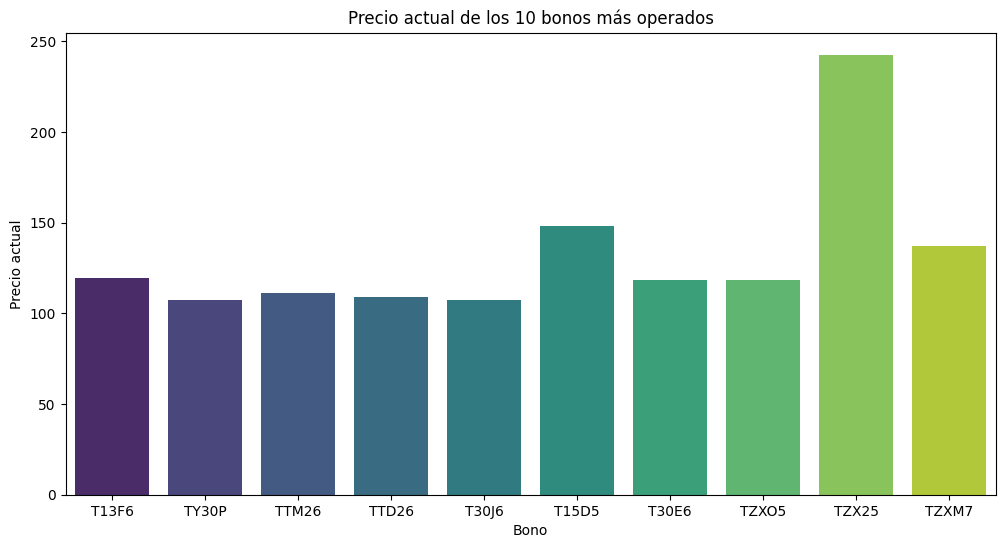

/tmp/ipython-input-19-925925827.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




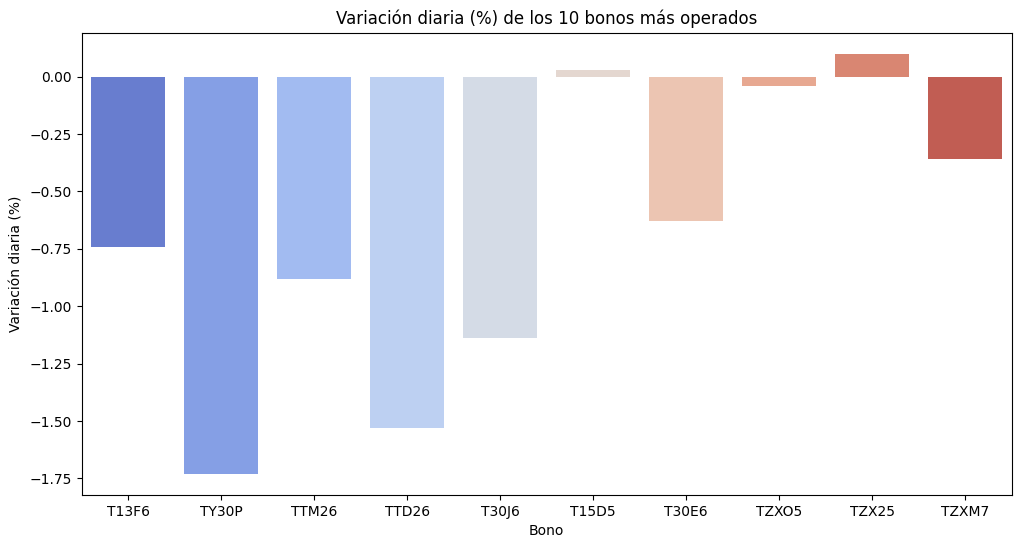

/tmp/ipython-input-19-925925827.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




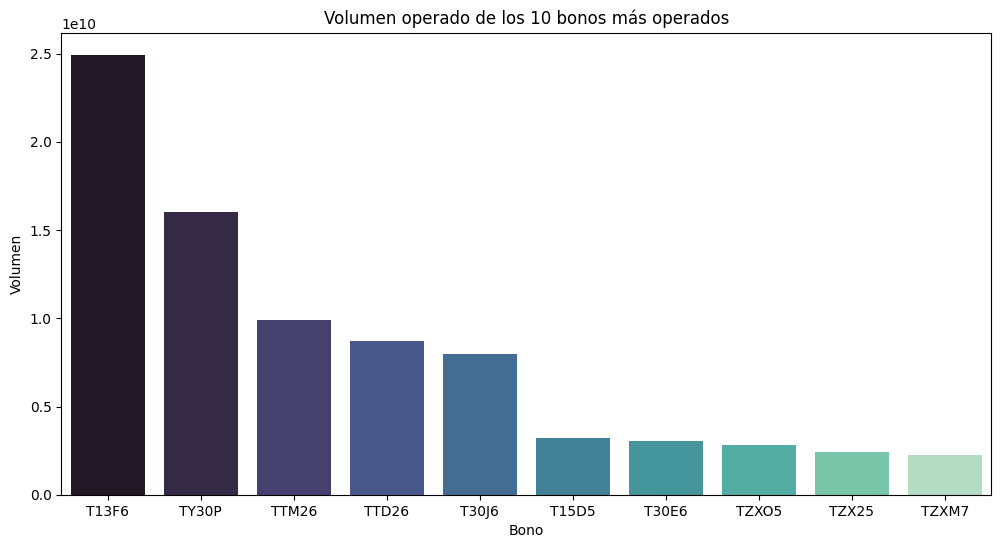

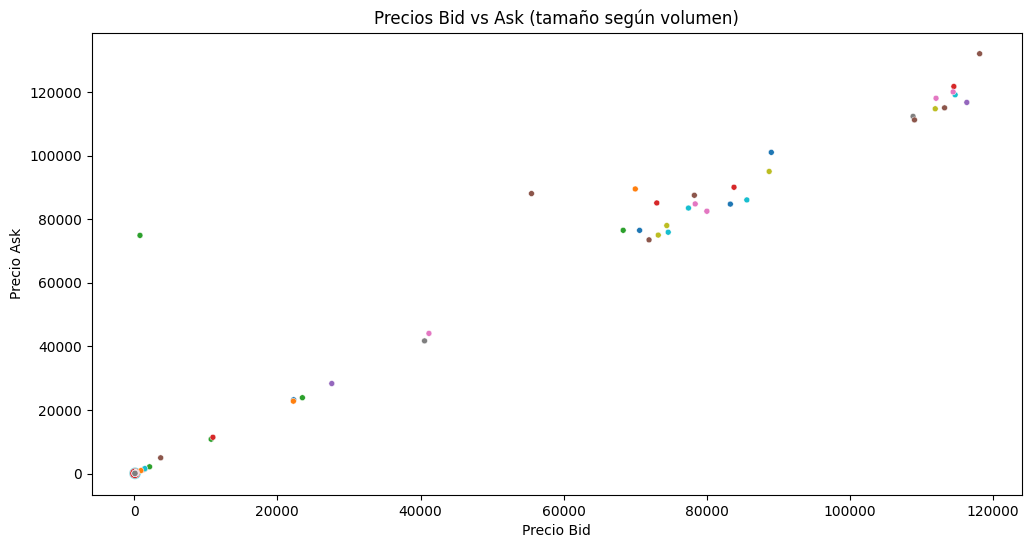

Top 5 bonos con mayor suba diaria:
    symbol          c  pct_change
48   EF25D      64.35        5.49
75   PMM29   71920.00        2.74
105  TZV26  111300.00        2.38
77   S24DD      64.40        2.22
9     AL35   80880.00        2.18

Top 5 bonos con mayor baja diaria:
    symbol          c  pct_change
90   TTM6C      0.092       -7.07
93    TVPE  11000.000       -4.34
102  TY30D      0.091       -3.19
92    TVPA   2180.000       -3.11
78   SA24D  73600.000       -2.76


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos los 10 bonos con mayor volumen para que el gráfico sea más claro
top_bonos = df_bonds.sort_values('v', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='c', palette='viridis')
plt.title('Precio actual de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Precio actual')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='pct_change', palette='coolwarm')
plt.title('Variación diaria (%) de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Variación diaria (%)')
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='v', palette='mako')
plt.title('Volumen operado de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Volumen')
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_bonds, x='px_bid', y='px_ask', size='v', hue='symbol', palette='tab10', legend=False)
plt.title('Precios Bid vs Ask (tamaño según volumen)')
plt.xlabel('Precio Bid')
plt.ylabel('Precio Ask')
plt.show()


top_ganadores = df_bonds.sort_values('pct_change', ascending=False).head(5)
top_perdedores = df_bonds.sort_values('pct_change').head(5)

print("Top 5 bonos con mayor suba diaria:")
print(top_ganadores[['symbol', 'c', 'pct_change']])

print("\nTop 5 bonos con mayor baja diaria:")
print(top_perdedores[['symbol', 'c', 'pct_change']])

In [ ]:
import plotly.graph_objects as go

# 1. Filtrar el bono por ticker
ticker = "T13F6"  # Cambia esto por el ticker que quieras analizar
filtro = df_bonds[df_bonds['symbol'] == ticker]

if filtro.empty:
    print(f"No se encontró el ticker '{ticker}' en el DataFrame.")
else:
    bono = filtro.iloc[0]

    # 2. Diccionario con los datos disponibles
    descripcion = {
        "Precio": bono['c'],
        "Variación diaria": f"{bono['pct_change']}%",
        "Cantidad Bid": bono['q_bid'],
        "Precio Bid": bono['px_bid'],
        "Precio Ask": bono['px_ask'],
        "Cantidad Ask": bono['q_ask'],
        "Volumen": bono['v'],
        "Operaciones": bono['q_op']
    }

    # 3. Crear la tabla
    desc_table = go.Figure(
        data=[
            go.Table(
                header=dict(values=["<b>Descripción</b>", "<b>Valor</b>"]),
                cells=dict(values=[list(descripcion.keys()), list(descripcion.values())])
            )
        ]
    )

    desc_table.update_layout(width=450, height=400)
    desc_table.show()


In [ ]:
print(df_bonds['symbol'].unique())

['AE38' 'AE38C' 'AE38D' 'AL29' 'AL29C' 'AL29D' 'AL30' 'AL30C' 'AL30D'
 'AL35' 'AL35C' 'AL35D' 'AL41' 'AL41C' 'AL41D' 'BA37D' 'BA7DC' 'BA7DD'
 'BB37D' 'BB7DD' 'BC37D' 'BC37E' 'BDC28' 'BNA26' 'BPA7C' 'BPA7D' 'BPB7C'
 'BPB7D' 'BPC7C' 'BPC7D' 'BPD7C' 'BPD7D' 'BPJ25' 'BPJ5C' 'BPJ5D' 'BPOA7'
 'BPOB7' 'BPOC7' 'BPOD7' 'BPY26' 'BPY6C' 'BPY6D' 'CO26' 'CO26D' 'CUAP'
 'D16E6' 'DICP' 'DIP0' 'EF25D' 'ERF25' 'GD29' 'GD29C' 'GD29D' 'GD30'
 'GD30C' 'GD30D' 'GD35' 'GD35C' 'GD35D' 'GD38' 'GD38C' 'GD38D' 'GD41'
 'GD41C' 'GD41D' 'GD46' 'GD46C' 'GD46D' 'NDT25' 'NDT5D' 'PAP0' 'PARP'
 'PBY26' 'PM29C' 'PM29D' 'PMM29' 'PR17' 'S24DD' 'SA24D' 'T13F6' 'T15D5'
 'T15E7' 'T17O5' 'T30E6' 'T30J6' 'TG25' 'TO26' 'TTD26' 'TTJ26' 'TTM26'
 'TTM6C' 'TTS26' 'TVPA' 'TVPE' 'TVPP' 'TVPY' 'TX25' 'TX26' 'TX26D' 'TX28'
 'TX28D' 'TX31' 'TY30D' 'TY30P' 'TZV25' 'TZV26' 'TZVD5' 'TZX25' 'TZX26'
 'TZX27' 'TZX28' 'TZXD5' 'TZXD6' 'TZXD7' 'TZXM6' 'TZXM7' 'TZXO5' 'TZXO6']


# DESAGREGADO

/tmp/ipython-input-3-3173517972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bonos, x='symbol', y='c', palette='viridis')


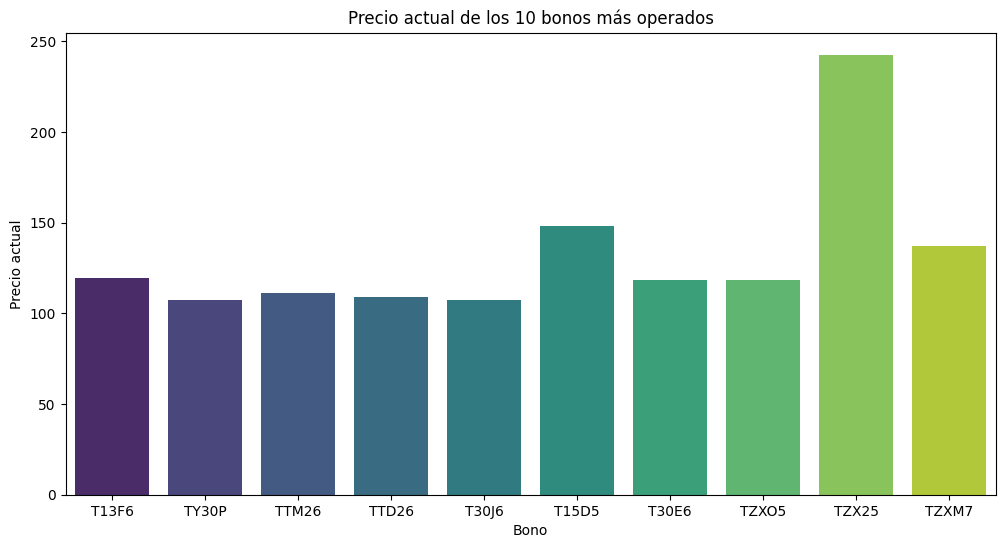

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos los 10 bonos con mayor volumen para que el gráfico sea más claro
top_bonos = df_bonds.sort_values('v', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='c', palette='viridis')
plt.title('Precio actual de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Precio actual')
plt.show()

/tmp/ipython-input-4-1404834769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bonos, x='symbol', y='pct_change', palette='coolwarm')


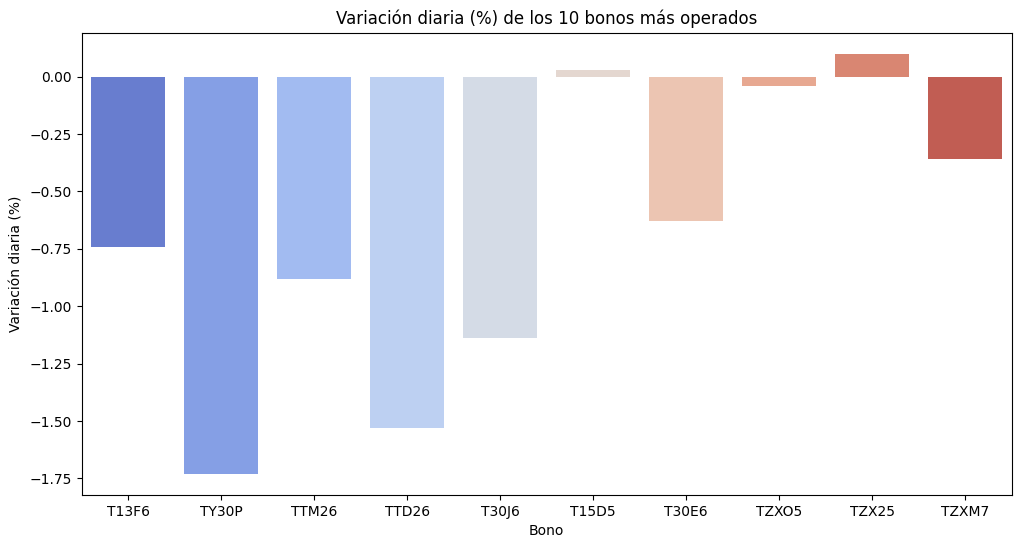

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='pct_change', palette='coolwarm')
plt.title('Variación diaria (%) de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Variación diaria (%)')
plt.show()

/tmp/ipython-input-5-747435123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bonos, x='symbol', y='v', palette='mako')


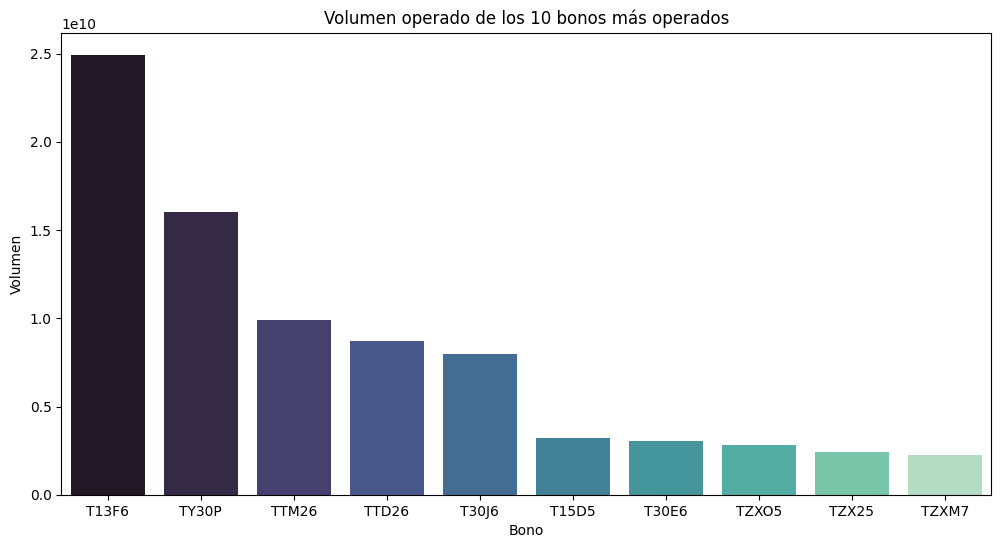

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_bonos, x='symbol', y='v', palette='mako')
plt.title('Volumen operado de los 10 bonos más operados')
plt.xlabel('Bono')
plt.ylabel('Volumen')
plt.show()

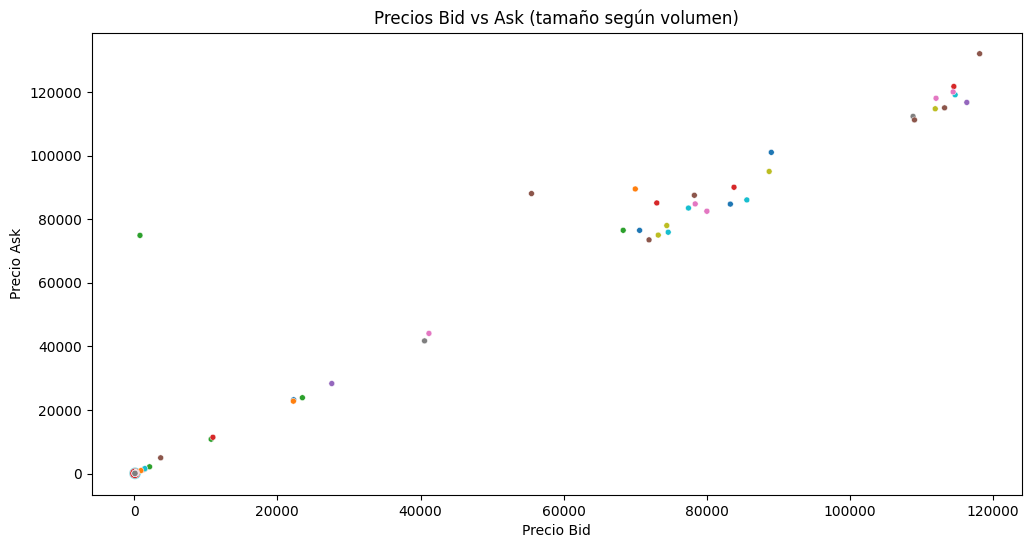

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_bonds, x='px_bid', y='px_ask', size='v', hue='symbol', palette='tab10', legend=False)
plt.title('Precios Bid vs Ask (tamaño según volumen)')
plt.xlabel('Precio Bid')
plt.ylabel('Precio Ask')
plt.show()

In [ ]:
top_ganadores = df_bonds.sort_values('pct_change', ascending=False).head(5)
top_perdedores = df_bonds.sort_values('pct_change').head(5)

print("Top 5 bonos con mayor suba diaria:")
print(top_ganadores[['symbol', 'c', 'pct_change']])

print("\nTop 5 bonos con mayor baja diaria:")
print(top_perdedores[['symbol', 'c', 'pct_change']])

Top 5 bonos con mayor suba diaria:
    symbol          c  pct_change
48   EF25D      64.35        5.49
75   PMM29   71920.00        2.74
105  TZV26  111300.00        2.38
77   S24DD      64.40        2.22
9     AL35   80880.00        2.18

Top 5 bonos con mayor baja diaria:
    symbol          c  pct_change
90   TTM6C      0.092       -7.07
93    TVPE  11000.000       -4.34
102  TY30D      0.091       -3.19
92    TVPA   2180.000       -3.11
78   SA24D  73600.000       -2.76


In [ ]:
print(df_bonds['symbol'].unique())

['AE38' 'AE38C' 'AE38D' 'AL29' 'AL29C' 'AL29D' 'AL30' 'AL30C' 'AL30D'
 'AL35' 'AL35C' 'AL35D' 'AL41' 'AL41C' 'AL41D' 'BA37D' 'BA7DC' 'BA7DD'
 'BB37D' 'BB7DD' 'BC37D' 'BC37E' 'BDC28' 'BNA26' 'BPA7C' 'BPA7D' 'BPB7C'
 'BPB7D' 'BPC7C' 'BPC7D' 'BPD7C' 'BPD7D' 'BPJ25' 'BPJ5C' 'BPJ5D' 'BPOA7'
 'BPOB7' 'BPOC7' 'BPOD7' 'BPY26' 'BPY6C' 'BPY6D' 'CO26' 'CO26D' 'CUAP'
 'D16E6' 'DICP' 'DIP0' 'EF25D' 'ERF25' 'GD29' 'GD29C' 'GD29D' 'GD30'
 'GD30C' 'GD30D' 'GD35' 'GD35C' 'GD35D' 'GD38' 'GD38C' 'GD38D' 'GD41'
 'GD41C' 'GD41D' 'GD46' 'GD46C' 'GD46D' 'NDT25' 'NDT5D' 'PAP0' 'PARP'
 'PBY26' 'PM29C' 'PM29D' 'PMM29' 'PR17' 'S24DD' 'SA24D' 'T13F6' 'T15D5'
 'T15E7' 'T17O5' 'T30E6' 'T30J6' 'TG25' 'TO26' 'TTD26' 'TTJ26' 'TTM26'
 'TTM6C' 'TTS26' 'TVPA' 'TVPE' 'TVPP' 'TVPY' 'TX25' 'TX26' 'TX26D' 'TX28'
 'TX28D' 'TX31' 'TY30D' 'TY30P' 'TZV25' 'TZV26' 'TZVD5' 'TZX25' 'TZX26'
 'TZX27' 'TZX28' 'TZXD5' 'TZXD6' 'TZXD7' 'TZXM6' 'TZXM7' 'TZXO5' 'TZXO6']


In [ ]:
   print(df_bonds.columns)

Index(['symbol', 'q_bid', 'px_bid', 'px_ask', 'q_ask', 'v', 'q_op', 'c',
       'pct_change', 'tipo'],
      dtype='object')


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Filtrar el bono por ticker
ticker = "T13F6"  # Cambia esto por el ticker que quieras analizar
filtro = df_bonds[df_bonds['symbol'] == ticker]

if filtro.empty:
    print(f"No se encontró el ticker '{ticker}' en el DataFrame.")
else:
    bono = filtro.iloc[0]

    # 2. Diccionario solo con las columnas que tienes
    descripcion = {
        "Precio": bono['c'],
        "Variación diaria": f"{bono['pct_change']}%",
        "Cantidad Bid": bono['q_bid'],
        "Precio Bid": bono['px_bid'],
        "Precio Ask": bono['px_ask'],
        "Cantidad Ask": bono['q_ask'],
        "Volumen": bono['v'],
        "Operaciones": bono['q_op']
    }



    # 4. Crear y mostrar las tablas
    desc_table = go.Table(
        header=dict(values=["<b>Descripción</b>", "<b>Valor</b>"]),
        cells=dict(values=[list(descripcion.keys()), list(descripcion.values())])
    )



    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Descripción", "Métricas"),
        specs=[[{"type": "table"}, {"type": "table"}]]
    )

    fig.add_trace(desc_table, row=1, col=1)
    fig.add_trace(met_table, row=1, col=2)

    fig.update_layout(width=900, height=400, showlegend=False)
    fig.show()

# ANÁLISIS 2

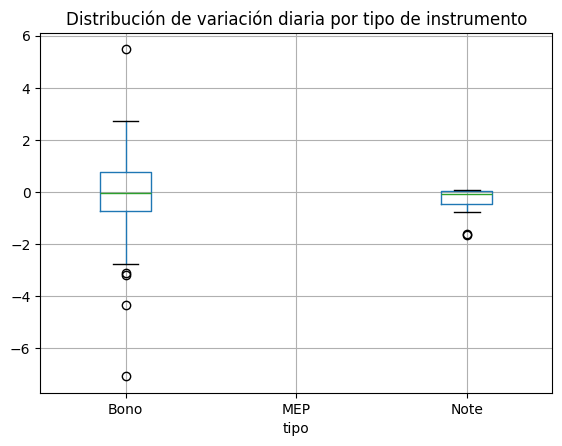

In [ ]:
import matplotlib.pyplot as plt

df_meps['tipo'] = 'MEP'
df_notes['tipo'] = 'Note'
df_bonds['tipo'] = 'Bono'

df_all = pd.concat([df_meps, df_notes, df_bonds])
df_all['spread'] = df_all['px_ask'] - df_all['px_bid']

# Gráfico de boxplot por tipo de bono
df_all.boxplot(column='pct_change', by='tipo')
plt.title('Distribución de variación diaria por tipo de instrumento')
plt.suptitle('')
plt.show()


In [ ]:
import pandas as pd

# Datos de ejemplo
data = '''Especie	Último precio	VAR.	Volumen	TIR	Aper.
BPO BPOA7 BOPREAL S. 1 A VTO31/10/27 U$S CG	AR$ 118.890,00	-0,17%	1.215.210.087	4,93 %	119.300,00
BPY BPY26 BOPREAL S.3 VTO31/05/26 U$S CG	AR$ 117.340,00	1,07%	6.235.183.880	5,24 %	116.000,00
TZV TZV25 BONO DOLAR LINKED TZV25	AR$ 116.690,00	1,46%	14.533.446.985	274,32 %	116.700,00'''

# Procesar los datos
lines = data.strip().split('\n')
headers = lines[0].split('\t')

# Preparar los datos para el DataFrame
rows = []
for line in lines[1:]:
    values = line.split('\t')

    # Limpiar y formatear los valores
    precio = values[1].replace('AR$ ', '').replace('.', '').replace(',', '.')
    variacion = values[2].replace('%', '')
    volumen = values[3].replace('.', '')
    tir = values[4].replace(' %', '')
    apertura = values[5].replace('.', '').replace(',', '.')

    rows.append({
        'Especie': values[0],
        'Último precio': float(precio),
        'VAR.': float(variacion),
        'Volumen': int(volumen),
        'TIR': float(tir),
        'Aper.': float(apertura)
    })

# Crear el DataFrame
df = pd.DataFrame(rows)

# Mostrar el DataFrame
print("\nDataFrame resultante:")
print(df)

# Guardar el DataFrame en un archivo CSV
df.to_csv('bonos_data.csv', index=False)
print("\nLos datos han sido guardados en 'bonos_data.csv'")

ValueError: could not convert string to float: '-0,17'